# Testing CAPPI data with Py-ART and wradlib

@author: Camila Lopes (camila.lopes@iag.usp.br)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader

import pyart
import wradlib as wrl

from read_sipam_cappis import read_sipam_cappi


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [ ]:
def ppi_to_grid(filename):

    # Read data and convert to grid
    radar = pyart.aux_io.read_gamic(filename)
    grid = pyart.map.grid_from_radars(
        radar, grid_shape=(20, 501, 501),
        grid_limits=((1e3, 20e3), (-250e3, 250e3), (-250e3, 250e3))
    )

    return grid

In [3]:
filename = "../data/radar/sipam_manaus/arm_cappi/2014-01/20140103/sbmn_cappi_20140103_160011.nc"
wset = wrl.io.read_generic_netcdf(filename)

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
plt.imshow(wset['variables']['DBZc']['data'][0, 20, :, :])

In [ ]:
xset = xr.open_dataset(filename)
xset.variables['z0']

In [4]:
dset = netCDF4.Dataset(filename)
dset

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    history: Applying azimuth offset: 0, time 2017/08/25 17:42:29
Applying elevation offset: 0, time 2017/08/25 17:42:29

    institution: SIPAM/Texas A&M University
    references: http://atmo.tamu.edu/goamazon-sband-radar
    source: 
    title: unknown
    comment: v2.0a; Created at Texas A&M University (cschu@tamu.edu)
    dimensions(sizes): time(1), bounds(2), x0(241), y0(241), z0(40)
    variables(dimensions): float64 time(time), float64 start_time(time), float64 stop_time(time), float64 time_bounds(time, bounds), float32 x0(x0), float32 y0(y0), float32 lat0(y0, x0), float32 lon0(y0, x0), float32 z0(z0), int32 grid_mapping_0(), float32 VEL(time, z0, y0, x0), float32 DBZc(time, z0, y0, x0), float32 range(time, z0, y0, x0), float32 Coverage(time, z0, y0, x0)
    groups: 

In [5]:
print(dset.variables["lat0"][:][-1,-1] - dset.variables["lat0"][:][-2,-2],
dset.variables["lat0"][:][-3,-3] - dset.variables["lat0"][:][-2,-2],
dset.variables["lat0"][:][-3,-3] - dset.variables["lat0"][:][-4,-4])


0.017990708 -0.01799059 0.01799047


/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dset.variables['time_bounds']

In [ ]:
grid = ppi_to_grid("../data/radar/sipam_manaus/arm/201401/RADL08061720140103031200.HDF5")

In [6]:
cappi = read_sipam_cappi(filename)

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
cappi.get_projparams()

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'proj': 'aeqd', 'lon_0': -59.992, 'lat_0': -3.1493}

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-61.253257714947 -4.415361529211864 -58.73074344472099 -1.8825463888789955


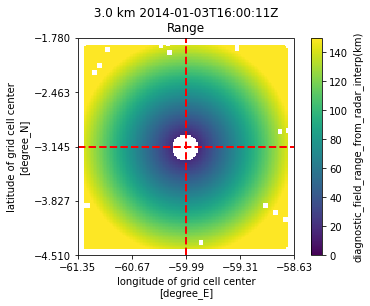

In [36]:
test = pyart.retrieve.grid_shift(cappi, advection=(0,0), trim_edges=50)
print(test.get_point_longitude_latitude()[0].min(),
        test.get_point_longitude_latitude()[1].min(),
        test.get_point_longitude_latitude()[0].max(),
        test.get_point_longitude_latitude()[1].max())
display = pyart.graph.GridMapDisplay(test)
display.plot_grid("range", level=5, vmin=0, vmax=150)
display.plot_crosshairs()

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-62.156701105475015 -5.31966543720328 -57.82730005419299 -0.9771160811694583


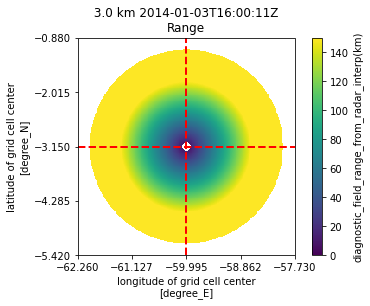

In [37]:
print(cappi.get_point_longitude_latitude()[0].min(),
        cappi.get_point_longitude_latitude()[1].min(),
        cappi.get_point_longitude_latitude()[0].max(),
        cappi.get_point_longitude_latitude()[1].max())
display = pyart.graph.GridMapDisplay(cappi)
display.plot_grid("range", level=5, vmin=0, vmax=150)
display.plot_crosshairs()

In [13]:
radar = wrl.io.hdf.read_generic_hdf5("../data/radar/sipam_manaus/arm/201401/RADL08061720140117013600.HDF5")

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
print(radar.keys())

# print(radar['scan0/how']['attrs']['elevation'])
# print(radar['scan1/how']['attrs']['elevation'])
# print(radar['scan2/how']['attrs']['elevation'])
# print(radar['scan3/how']['attrs']['elevation'])
# print(radar['scan4/how']['attrs']['elevation'])
# print(radar['scan5/how']['attrs']['elevation'])
# print(radar['scan6/how']['attrs']['elevation'])
# print(radar['scan7/how']['attrs']['elevation'])
# print(radar['scan8/how']['attrs']['elevation'])
# print(radar['scan9/how']['attrs']['elevation'])
# print(radar['scan10/how']['attrs']['elevation'])
# print(radar['scan11/how']['attrs']['elevation'])
# print(radar['scan12/how']['attrs']['elevation'])

print(radar['where'])

dict_keys(['how', 'scan0/how', 'scan0/how/extended', 'scan0/moment_0', 'scan0/moment_1', 'scan0/moment_2', 'scan0/moment_3', 'scan0/ray_header', 'scan0/what', 'scan1/how', 'scan1/how/extended', 'scan1/moment_0', 'scan1/moment_1', 'scan1/moment_2', 'scan1/moment_3', 'scan1/ray_header', 'scan1/what', 'scan10/how', 'scan10/how/extended', 'scan10/moment_0', 'scan10/moment_1', 'scan10/moment_2', 'scan10/moment_3', 'scan10/ray_header', 'scan10/what', 'scan11/how', 'scan11/how/extended', 'scan11/moment_0', 'scan11/moment_1', 'scan11/moment_2', 'scan11/moment_3', 'scan11/ray_header', 'scan11/what', 'scan12/how', 'scan12/how/extended', 'scan12/moment_0', 'scan12/moment_1', 'scan12/moment_2', 'scan12/moment_3', 'scan12/ray_header', 'scan12/what', 'scan2/how', 'scan2/how/extended', 'scan2/moment_0', 'scan2/moment_1', 'scan2/moment_2', 'scan2/moment_3', 'scan2/ray_header', 'scan2/what', 'scan3/how', 'scan3/how/extended', 'scan3/moment_0', 'scan3/moment_1', 'scan3/moment_2', 'scan3/moment_3', 'scan

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyart.util.datetime_from_grid(cappi).strftime('%Y%m%d%H%M%S')

In [ ]:
np.array(np.ma.MaskedArray.tolist(cappi.fields['DBZc']['data']))
# np.nanmax(x[x != None])

In [ ]:
display = pyart.graph.GridMapDisplay(cappi)
projection = ccrs.PlateCarree()
display.plot_grid('DBZc', level=0, projection=projection)

In [ ]:
display.grid.to_xarray()

In [ ]:
raw = pyart.aux_io.read_gamic(
    "../data/radar/sipam_manaus/arm/201401/RADL08061720140103031200.HDF5")

"%.2f" % raw.fixed_angle['data'][0]

In [ ]:
ranges = raw.range['data']
elevs = raw.fixed_angle['data']
site = (float(raw.longitude['data']),
        float(raw.latitude['data']),
        float(raw.altitude['data']))
beamwidth = float(raw.instrument_parameters['radar_beam_width_h']['data'])


ax = wrl.vis.plot_scan_strategy(ranges, elevs, site, beamwidth, vert_res=1000, maxalt=20000, units='km')
ax.set_title('SIPAM S-Band')

In [ ]:
# GoAmazon site locations
sites = pd.read_csv("../data/general/goamazon_sites.csv", sep=";", decimal=",")
sites['Latitude']

In [ ]:
# Range rings + site locations
display = pyart.graph.RadarMapDisplay(raw)
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

display.plot_ppi_map("corrected_reflectivity", 0, vmin=0, shapefile="../data/general/shapefiles/lineaire_1km",
    shapefile_kwargs={"facecolor": "None", "edgecolor": "darkblue", "alpha": 0.5, "linewidth": 0.75})
# GoAmazon sites
ax.scatter(sites["Longitude"], sites["Latitude"], s=5, c='red')
ax.annotate(sites["GoAmazon2014/5 reference"][0], xy=(sites["Longitude"][0], sites["Latitude"][0]))
ax.annotate(sites["GoAmazon2014/5 reference"][1], xy=(sites["Longitude"][1], sites["Latitude"][1]))
ax.annotate(sites["GoAmazon2014/5 reference"][2], xy=(sites["Longitude"][2], sites["Latitude"][2]))
ax.annotate(sites["GoAmazon2014/5 reference"][3], xy=(sites["Longitude"][3], sites["Latitude"][3]), horizontalalignment='right')
ax.annotate(sites["GoAmazon2014/5 reference"][4], xy=(sites["Longitude"][4], sites["Latitude"][4]), horizontalalignment='right')
ax.annotate(sites["GoAmazon2014/5 reference"][5], xy=(sites["Longitude"][5], sites["Latitude"][5]))
ax.annotate(sites["GoAmazon2014/5 reference"][6], xy=(sites["Longitude"][6], sites["Latitude"][6]), horizontalalignment='right')
ax.annotate(sites["GoAmazon2014/5 reference"][7], xy=(sites["Longitude"][7], sites["Latitude"][7]))
ax.annotate(sites["GoAmazon2014/5 reference"][8], xy=(sites["Longitude"][8], sites["Latitude"][8]), horizontalalignment='right')
# Adding shapefile
ax.add_geometries(Reader("../data/general/shapefiles/AM_Municipios_2019").geometries(), ccrs.PlateCarree(), linewidth=0.75,
    facecolor="None", edgecolor="darkgray", alpha=0.8)
# Adding gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, xlocs=np.arange(-70, -50, 1), ylocs=np.arange(-10, 1, 1), alpha=0.5)
gl.top_labels = gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
display.plot_range_rings([50, 100, 150, 200, 250], ax=ax, col="black", lw=1)
plt.savefig("figs/sipam_range_rings.png", dpi=300, bbox_inches="tight")


In [14]:
cappi = read_sipam_cappi("../data/radar/sipam_manaus/arm_cappi/2015-04/20150403/sbmn_cappi_20150403_084807.nc")
dset = netCDF4.Dataset("../data/radar/sipam_manaus/arm_cappi/2015-04/20150403/sbmn_cappi_20150403_084807.nc")
wset = wrl.io.read_generic_netcdf("../data/radar/sipam_manaus/arm_cappi/2015-04/20150403/sbmn_cappi_20150403_084807.nc")

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-62.156701105475015 -5.31966543720328 -57.82730005419299 -0.9771160811694583


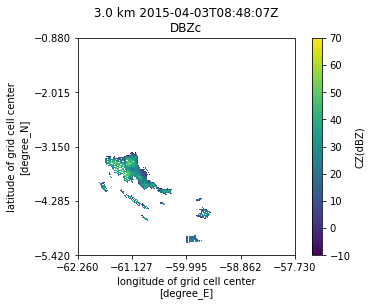

In [33]:
print(cappi.get_point_longitude_latitude()[0].min(),
        cappi.get_point_longitude_latitude()[1].min(),
        cappi.get_point_longitude_latitude()[0].max(),
        cappi.get_point_longitude_latitude()[1].max())
display = pyart.graph.GridMapDisplay(cappi)
display.plot_grid("DBZc", level=5, vmin=-10, vmax=70, imshow=True)

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


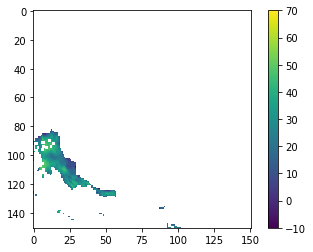

In [50]:
subset = slice(45, -45)
test = np.flipud(cappi.fields['DBZc']['data'][5][subset, subset])
plt.imshow(test, vmin=-10, vmax=70)
plt.colorbar()

In [52]:
print(cappi.get_point_longitude_latitude()[0].shape)

(241, 241)


/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


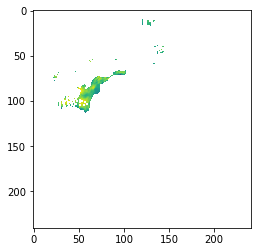

In [26]:
# print(dset.variables["lat0"][-1,:])
plt.imshow(dset.variables["DBZc"][0][5])

/home/cclopes/miniconda3/envs/amazon-storms-aerosols/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


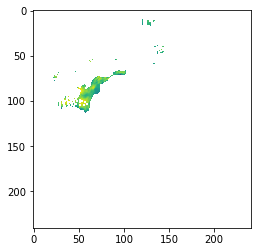

In [20]:
plt.imshow(wset['variables']['DBZc']['data'][0][5])